# Avacado is a fruit consumed by people heavily in United states.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Some relevant columns in the dataset:

* Date - The date of the observation

* AveragePrice - the average price of a single avocado

* type - conventional or organic

* year - the year

* Region - the city or region of the observation

* Total Volume - Total number of avocados sold

* 4046 - Total number of avocados with PLU 4046 sold

* 4225 - Total number of avocados with PLU 4225 sold

* 4770 - Total number of avocados with PLU 4770 sold


Target is to find the city or region and find the average price of Avacado.

# Topics

* Types of Data 
 
 
* Reading data using pandas


* Visualizing data using seaborn & matloblib


* Model building 


     Preparing X and y using pandas

     Splitting X and y into training and testing sets
  


* Alogrrithms

  LR - Linear Regression

  KNN - KNeighbors Classifier

  SVM - Support Vector Machine

  SVR - Support Vector Regression

  NB - Naive Bayes

  DTC - Decision Tree Classifier


* Making predictions


* Model evaluation metrics

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('avocado.csv',sep=',',na_values=".")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# first five row

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
# droping unnecessary columns

df.drop(["Unnamed: 0","Date"],axis=1,inplace=True)

In [8]:
df.isnull()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

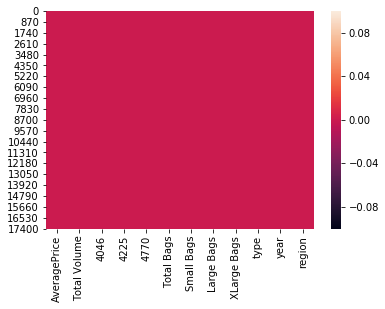

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [12]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [14]:
# class distribution 

print("Data is not balanced:",df.groupby('type').size())

Data is not balanced: type
conventional    9126
organic         9123
dtype: int64


In [15]:
# Univariate Analysis

df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [16]:
df.type.value_counts().sort_index()

conventional    9126
organic         9123
Name: type, dtype: int64

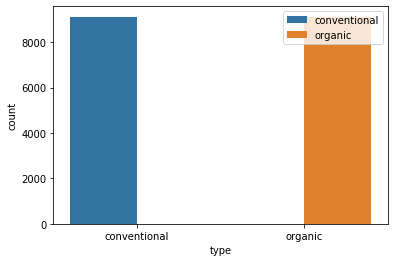

In [17]:
ctp=sns.countplot(x='type',hue="type",data=df)
plt.legend()

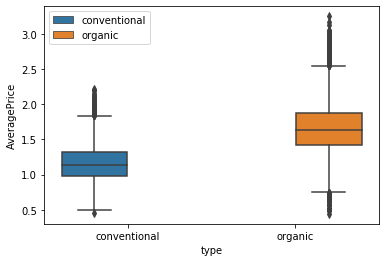

In [18]:
bpt=sns.boxplot(x="type",y="AveragePrice",data=df,hue="type")
plt.legend()

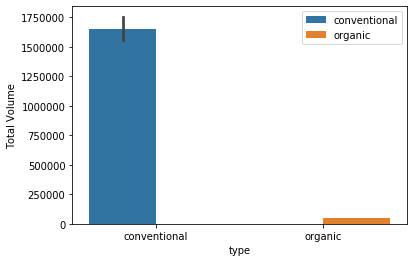

In [19]:
bpt=sns.barplot(x="type",y="Total Volume",data=df,hue="type")
plt.legend()
plt.show()

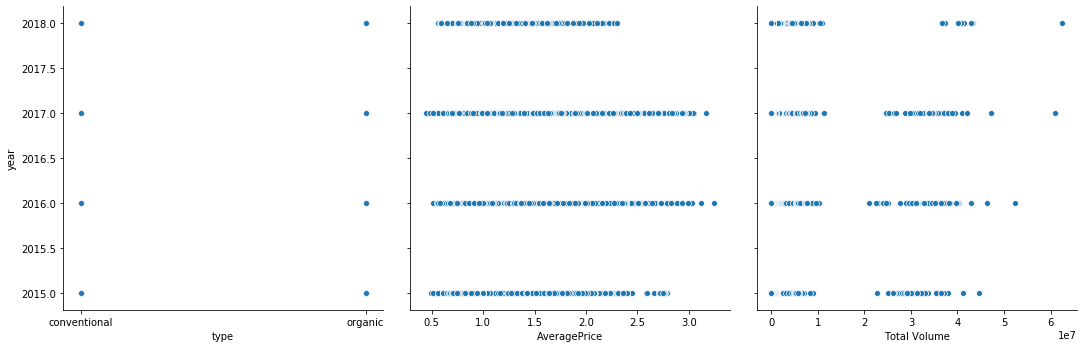

In [20]:
sns.pairplot(df,x_vars=['type','AveragePrice','Total Volume'],y_vars='year',height=5,aspect=1,kind='scatter')
plt.show()

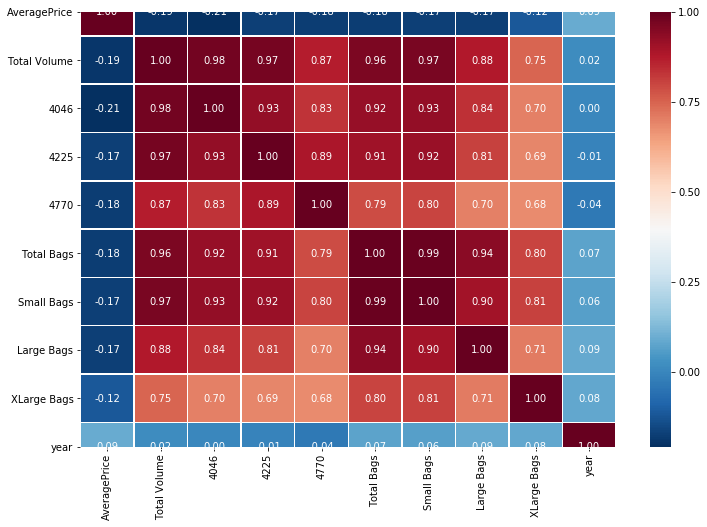

In [21]:
# checking correlation in heatmap

f,ax=plt.subplots(figsize=(12,8))
corr=df.corr()
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr,annot=True,cmap='RdBu_r',linewidths=0.5,linecolor="white",fmt='.2f',ax=ax)


In [22]:
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
year            0.093197
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

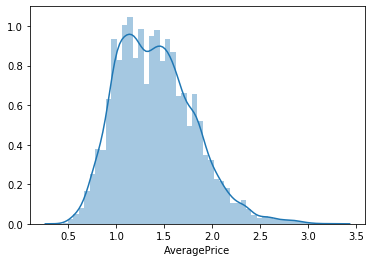

In [23]:
sns.distplot(df['AveragePrice'])

<function matplotlib.pyplot.show(*args, **kw)>

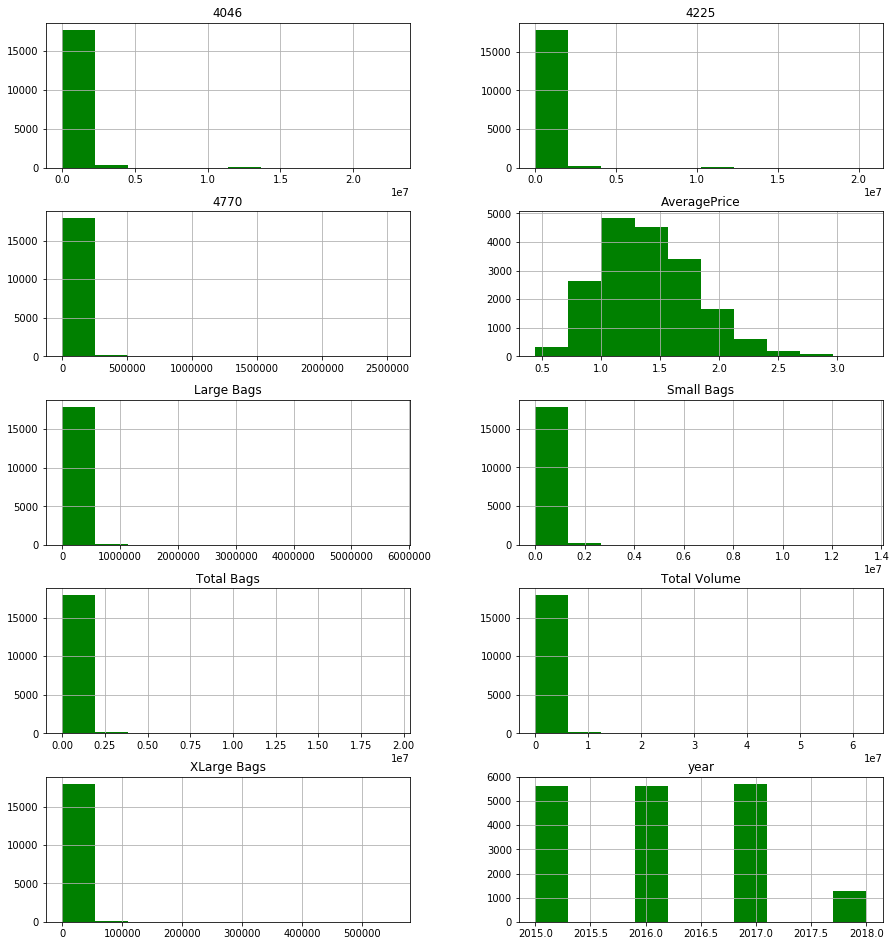

In [24]:
df.hist(figsize=(15,20),layout=(6,2),color='green')
plt.show

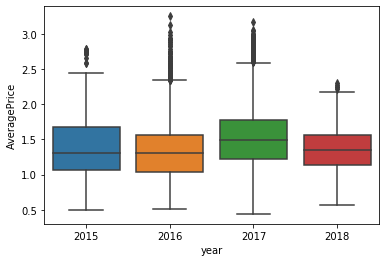

In [25]:
# Bivariate analysis

# Average Price and Year comparing

sns.boxplot(x='year',y='AveragePrice',data=df,)

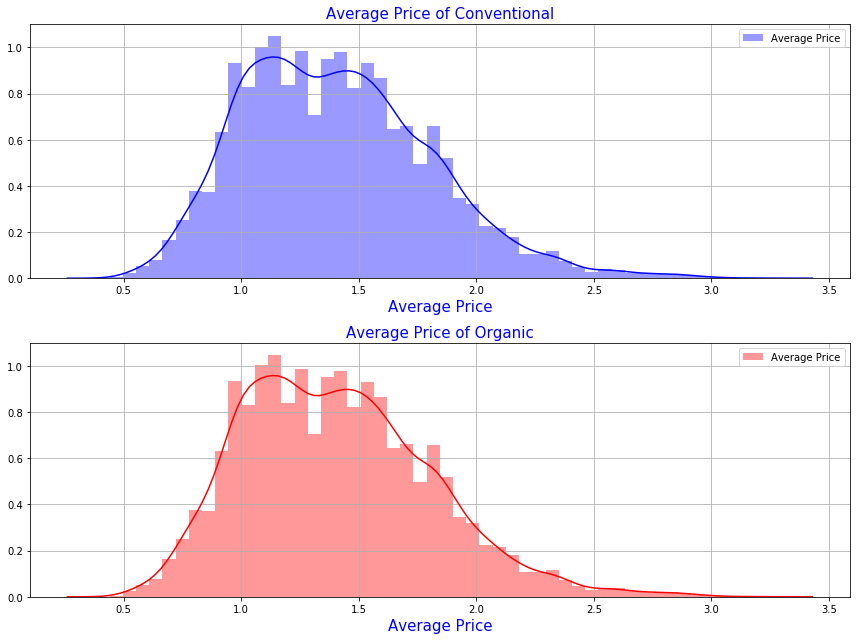

In [26]:
# two plots in parallel way up down

f,ax=plt.subplots(figsize=(12,9))
plt.subplot(2,1,1)
sns.distplot(df.AveragePrice,color="blue",label="Average Price");
plt.title("Average Price of Conventional",fontsize=15,color='blue')
plt.xlabel('Average Price',fontsize=15,color='blue')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
sns.distplot(df.AveragePrice,color="red",label="Average Price");
plt.title("Average Price of Organic",fontsize = 15,color='blue')
plt.xlabel('Average Price',fontsize=15,color='blue')
plt.tight_layout()
plt.legend()
plt.grid()

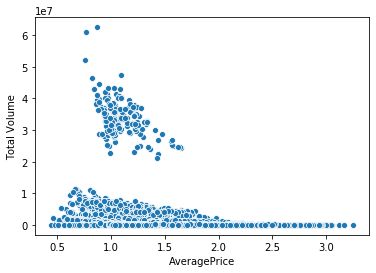

In [27]:
# AveragePrice and Total Volume comparing

sns.scatterplot(x='AveragePrice',y='Total Volume',data=df)

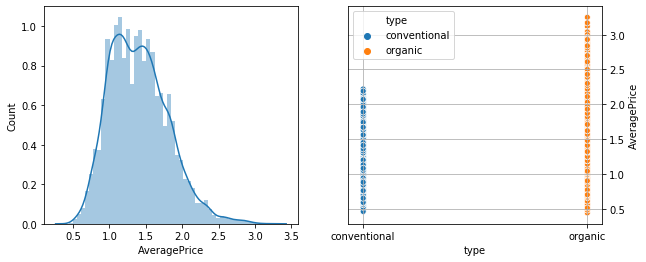

In [28]:
# two plots in parallel way

p, fig=plt.subplots(1,2,figsize=(10,4))
plt.grid()

sns.distplot(df['AveragePrice'],ax=fig[0])
fig[0].set_xlabel('AveragePrice',fontsize=10)
fig[0].set_ylabel('Count',fontsize=10)
fig[0].yaxis.tick_left()


sns.scatterplot(x ='type',y='AveragePrice',data=df,hue='type',ax=fig[1])
fig[1].set_xlabel('type',fontsize=10)
fig[1].set_ylabel('AveragePrice',fontsize=10)
fig[1].yaxis.set_label_position("right")
fig[1].yaxis.tick_right()


plt.show()

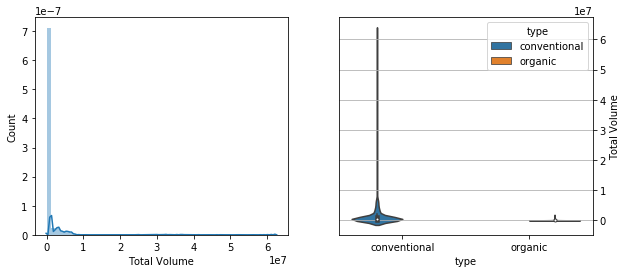

In [29]:
# two plots in parallel way

p, fig=plt.subplots(1,2,figsize=(10,4))
plt.grid()

sns.distplot(df['Total Volume'],ax=fig[0])
fig[0].set_xlabel('Total Volume',fontsize=10)
fig[0].set_ylabel('Count',fontsize=10)
fig[0].yaxis.tick_left()

sns.violinplot(x ='type',y='Total Volume',data=df,hue='type',ax=fig[1])
fig[1].set_xlabel('type',fontsize=10)
fig[1].set_ylabel('Total Volume',fontsize=10)
fig[1].yaxis.set_label_position("right")
fig[1].yaxis.tick_right()

plt.show()

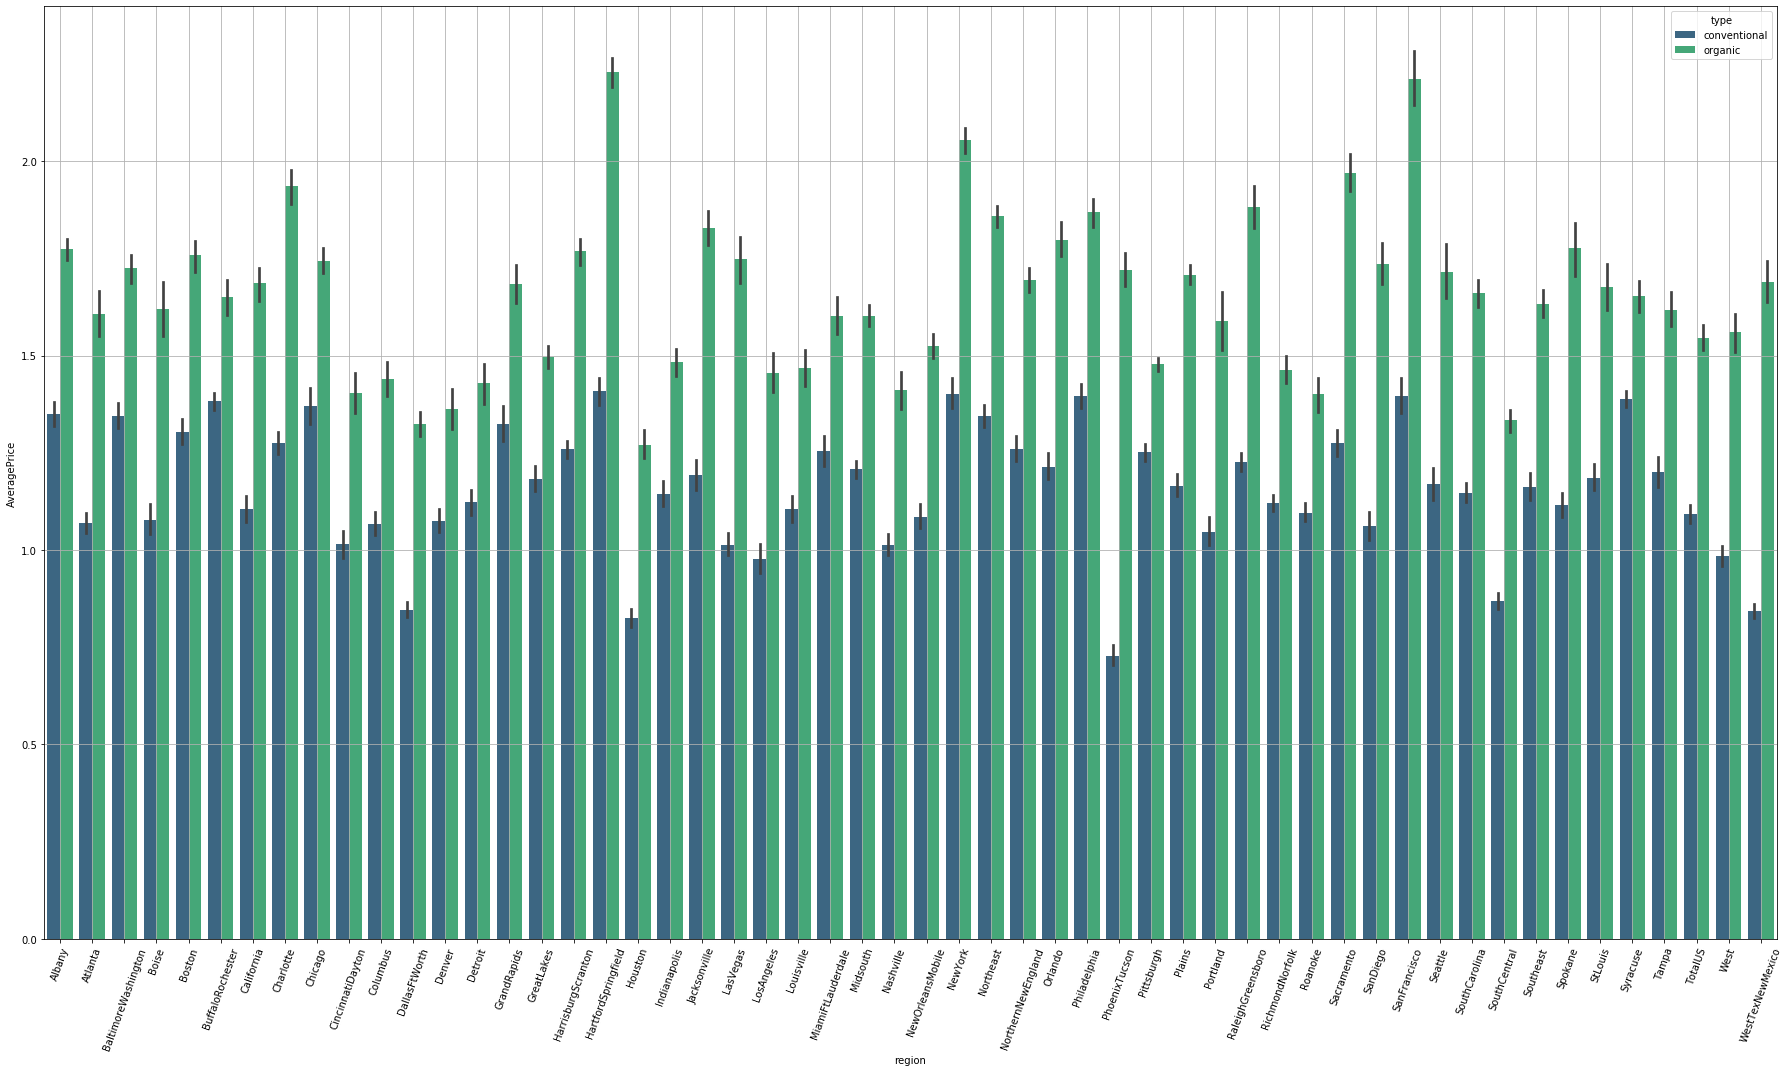

In [30]:
f,ax=plt.subplots(figsize=(25,15))
sns.barplot(x="region",y="AveragePrice",hue="type",data=df,palette="viridis")
plt.xticks(rotation=70)
plt.grid()
plt.tight_layout()

In [31]:
# create pivot table

pd.pivot_table(df,index=["type","year"],values=["AveragePrice","Total Volume"])

AveragePrice  Total Volume
type         year                            
conventional 2015      1.077963  1.530128e+06
             2016      1.105595  1.670317e+06
             2017      1.294888  1.665327e+06
             2018      1.127886  2.058960e+06
organic      2015      1.673324  3.165993e+04
             2016      1.571684  4.652424e+04
             2017      1.735521  5.879018e+04
             2018      1.567176  7.489548e+04

In [32]:
# group by type based on price volume bags and etc

type_dis=df.groupby('type')

# Display first few rows
type_dis.first()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
type,,,,,,,,,,,
conventional,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
organic,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,2015,Albany


In [33]:
region_dis=df.groupby('region')

region_dis.first()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
region,,,,,,,,,,,
Albany,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015
Atlanta,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015
BaltimoreWashington,1.17,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.00,conventional,2015
Boise,0.97,62909.69,30482.25,2971.94,5894.40,23561.10,23520.19,5.69,35.22,conventional,2015
Boston,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.00,conventional,2015
BuffaloRochester,1.35,96233.08,1367.81,39542.83,85.76,55236.68,55236.68,0.00,0.00,conventional,2015
California,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015
Charlotte,0.96,156698.24,33070.27,62956.24,23041.69,37630.04,35130.42,2499.62,0.00,conventional,2015
Chicago,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015


In [34]:
type_region=df.groupby(['type','region'])

type_region.first()

AveragePrice  Total Volume       4046  \
type         region                                                       
conventional Albany                       1.33      64236.62    1036.74   
             Atlanta                      0.99     386100.49  292097.36   
             BaltimoreWashington          1.17     596819.40   40450.49   
             Boise                        0.97      62909.69   30482.25   
             Boston                       1.13     450816.39    3886.27   
...                                        ...           ...        ...   
organic      Syracuse                     1.54       1652.19       0.00   
             Tampa                        1.63       2161.84     874.75   
             TotalUS                      1.52     549787.59   89709.92   
             West                         1.46     142710.36   29880.32   
             WestTexNewMexico             1.81       7155.63    1478.79   

                                       4225      4770  Total Bags  Small Bags  \
type         region                                                             
conventional Albany                54454.85     48.16     8696.87     8603.62   
             Atlanta               27350.92    297.90    66354.31    48605.95   
             BaltimoreWashington  394104.02  17353.79   144911.10   142543.88   
             Boise                  2971.94   5894.40    23561.10    23520.19   
             Boston               346964.70  13952.56    86012.86    85913.60   
...                                     ...       ...         ...         ...   
organic      Syracuse                 73.22      0.00     1578.97     1336.27   
             Tampa                    17.54      0.00     1269.55     1216.67   
             TotalUS              206198.62   5836.04   248043.01   142262.93   
             West                  48416.71     38.63    64374.70    17464.54   
             WestTexNewMexico       2629.64     14.10     3033.10     2855.55   

                                  Large Bags  XLarge Bags  year  
type         region                                              
conventional Albany                    93.25         0.00  2015  
             Atlanta                17748.36         0.00  2015  
             BaltimoreWashington     2367.22         0.00  2015  
             Boise                      5.69        35.22  2015  
             Boston                    99.26         0.00  2015  
...                                      ...          ...   ...  
organic      Syracuse                 242.70         0.00  2015  
             Tampa                     52.88         0.00  2015  
             TotalUS               105780.08         0.00  2015  
             West                   46910.16         0.00  2015  
             WestTexNewMexico         177.55         0.00  2015  

[108 rows x 10 columns]

In [35]:
# crosstab pivot table

pd.crosstab(df["region"],df["type"],margins=True)

type,conventional,organic,All
region,,,
Albany,169,169,338
Atlanta,169,169,338
BaltimoreWashington,169,169,338
Boise,169,169,338
Boston,169,169,338
BuffaloRochester,169,169,338
California,169,169,338
Charlotte,169,169,338
Chicago,169,169,338


In [36]:
pd.crosstab(df["year"],df["type"],margins=True)

type,conventional,organic,All
year,,,
2015,2808,2807,5615
2016,2808,2808,5616
2017,2862,2860,5722
2018,648,648,1296
All,9126,9123,18249


In [37]:
pd.crosstab(df["year"],df["AveragePrice"],margins=True)

AveragePrice,0.44,0.46,0.48,0.49,0.51,0.52,0.53,0.54,0.55,0.56,...,2.97,2.99,3.0,3.03,3.04,3.05,3.12,3.17,3.25,All
year,,,,,,,,,,,,,,,,,,,,,
2015,0,0,0,1,1,1,3,1,0,4,...,0,0,0,0,0,0,0,0,0,5615
2016,0,0,0,0,1,0,0,3,2,4,...,0,1,0,1,0,0,1,0,1,5616
2017,1,1,1,1,3,2,3,3,1,2,...,1,1,2,0,1,1,0,1,0,5722
2018,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1296
All,1,1,1,2,5,3,6,7,3,12,...,1,2,2,1,1,1,1,1,1,18249


In [38]:
pd.crosstab(df["type"],df["AveragePrice"],margins=True)

AveragePrice,0.44,0.46,0.48,0.49,0.51,0.52,0.53,0.54,0.55,0.56,...,2.97,2.99,3.0,3.03,3.04,3.05,3.12,3.17,3.25,All
type,,,,,,,,,,,,,,,,,,,,,
conventional,0,1,0,1,3,2,6,7,3,10,...,0,0,0,0,0,0,0,0,0,9126
organic,1,0,1,1,2,1,0,0,0,2,...,1,2,2,1,1,1,1,1,1,9123
All,1,1,1,2,5,3,6,7,3,12,...,1,2,2,1,1,1,1,1,1,18249


In [39]:
groupby=df.groupby(["year","AveragePrice","Total Volume"])
groupby.first()

4046       4225      4770  Total Bags  \
year AveragePrice Total Volume                                                
2015 0.49         1137707.43     738314.80  286858.37  11642.46   100891.80   
     0.51         1366844.88    1097285.22  164460.99   7534.30    97564.37   
     0.52         1457359.83    1130917.54  199669.94   4499.84   122272.51   
     0.53         1097224.25     785254.94  204147.30  10346.68    97475.33   
                  1272428.72    1012900.04  159158.29   5832.62    94537.77   
...                                    ...        ...       ...         ...   
2018 2.22         21708.65         9960.19    9215.13      0.00     2533.33   
     2.25         14635.63           82.78    5175.05    151.37     9226.43   
                  21551.76         9721.38    9543.71      0.00     2286.67   
     2.27         20325.75         9368.06    8808.80      0.00     2148.89   
     2.30         20151.24        10165.34    8042.56      0.00     1943.34   

                                Small Bags  Large Bags  XLarge Bags  \
year AveragePrice Total Volume                                        
2015 0.49         1137707.43      70749.02    30142.78          0.0   
     0.51         1366844.88      44646.67    52917.70          0.0   
     0.52         1457359.83      90030.35    32242.16          0.0   
     0.53         1097224.25      72169.92    25305.41          0.0   
                  1272428.72      76637.06    17900.71          0.0   
...                                    ...         ...          ...   
2018 2.22         21708.65         2533.33        0.00          0.0   
     2.25         14635.63         9000.42      226.01          0.0   
                  21551.76         2283.34        3.33          0.0   
     2.27         20325.75         2148.89        0.00          0.0   
     2.30         20151.24         1943.34        0.00          0.0   

                                        type             region  
year AveragePrice Total Volume                                   
2015 0.49         1137707.43    conventional      PhoenixTucson  
     0.51         1366844.88    conventional      PhoenixTucson  
     0.52         1457359.83    conventional      PhoenixTucson  
     0.53         1097224.25    conventional      PhoenixTucson  
                  1272428.72    conventional      PhoenixTucson  
...                                      ...                ...  
2018 2.22         21708.65           organic       SanFrancisco  
     2.25         14635.63           organic  RaleighGreensboro  
                  21551.76           organic       SanFrancisco  
     2.27         20325.75           organic       SanFrancisco  
     2.30         20151.24           organic       SanFrancisco  

[18249 rows x 9 columns]

In [40]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

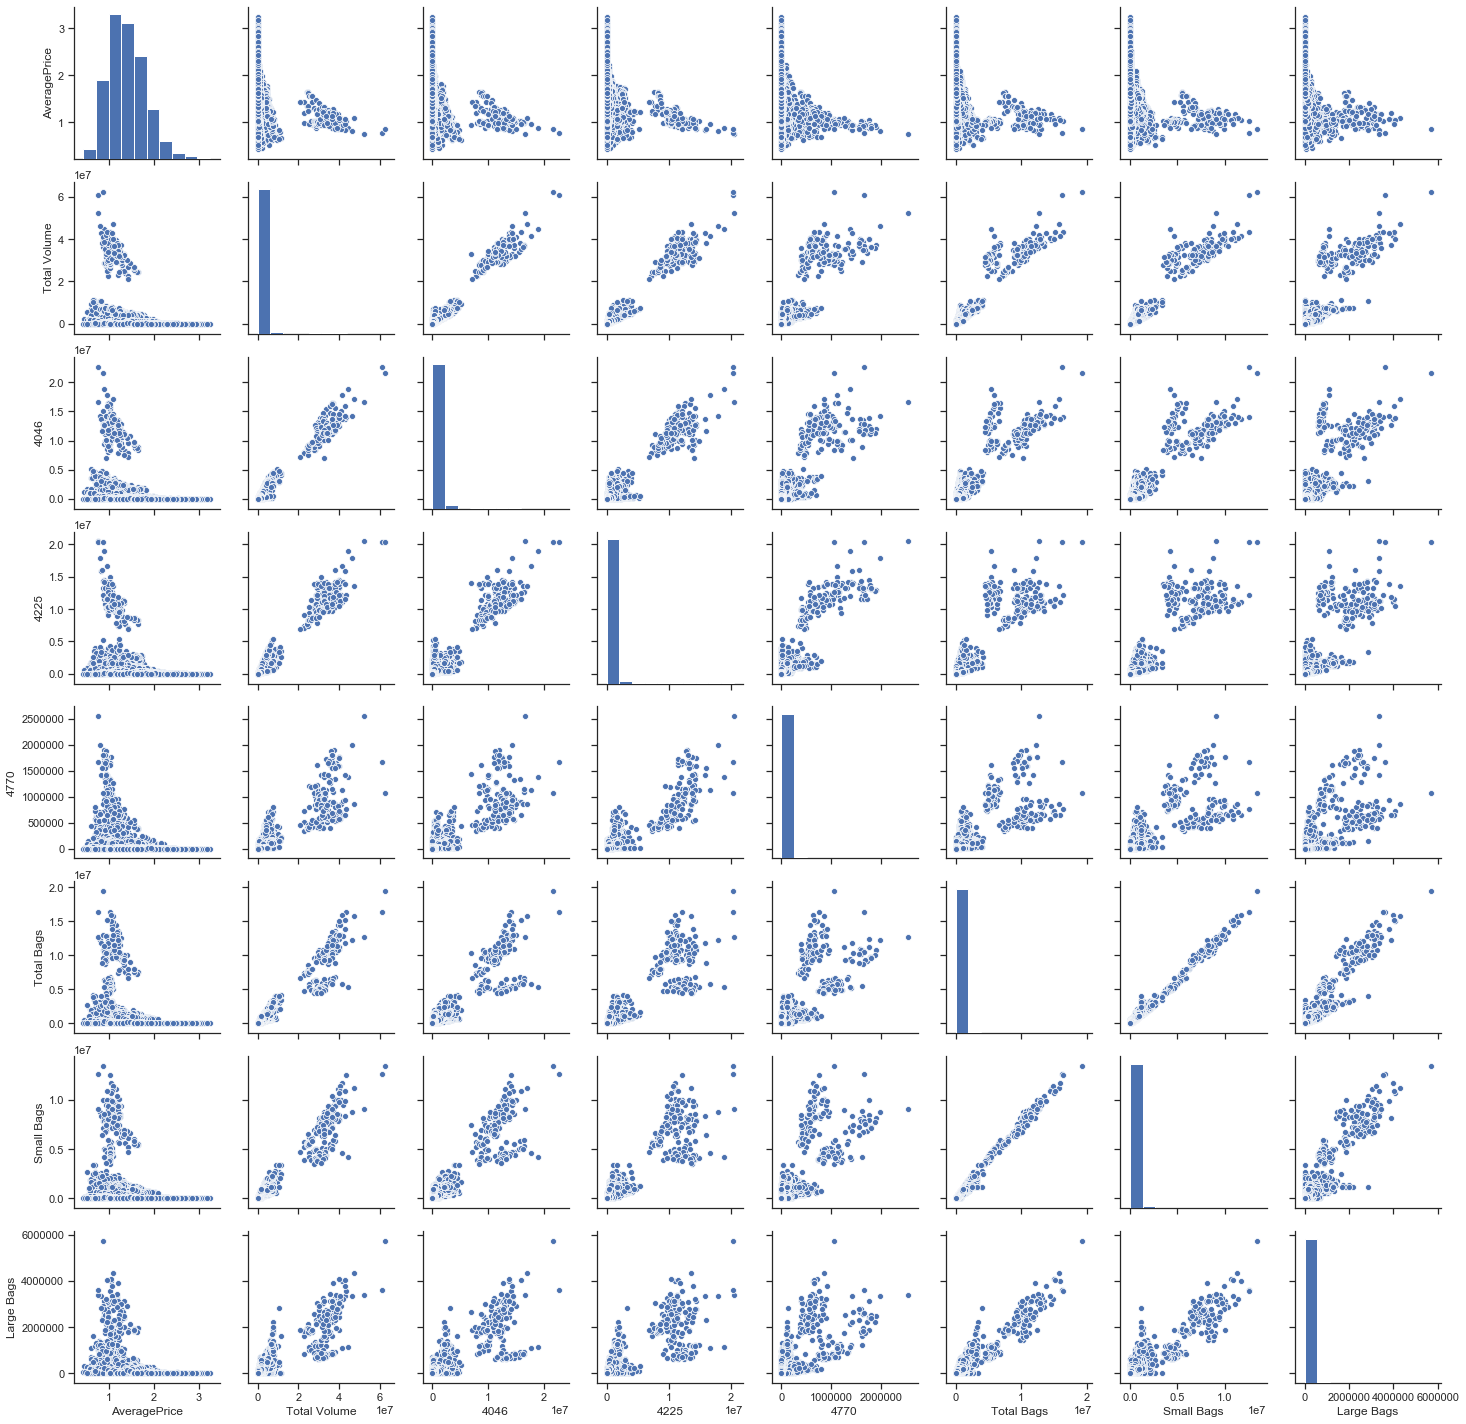

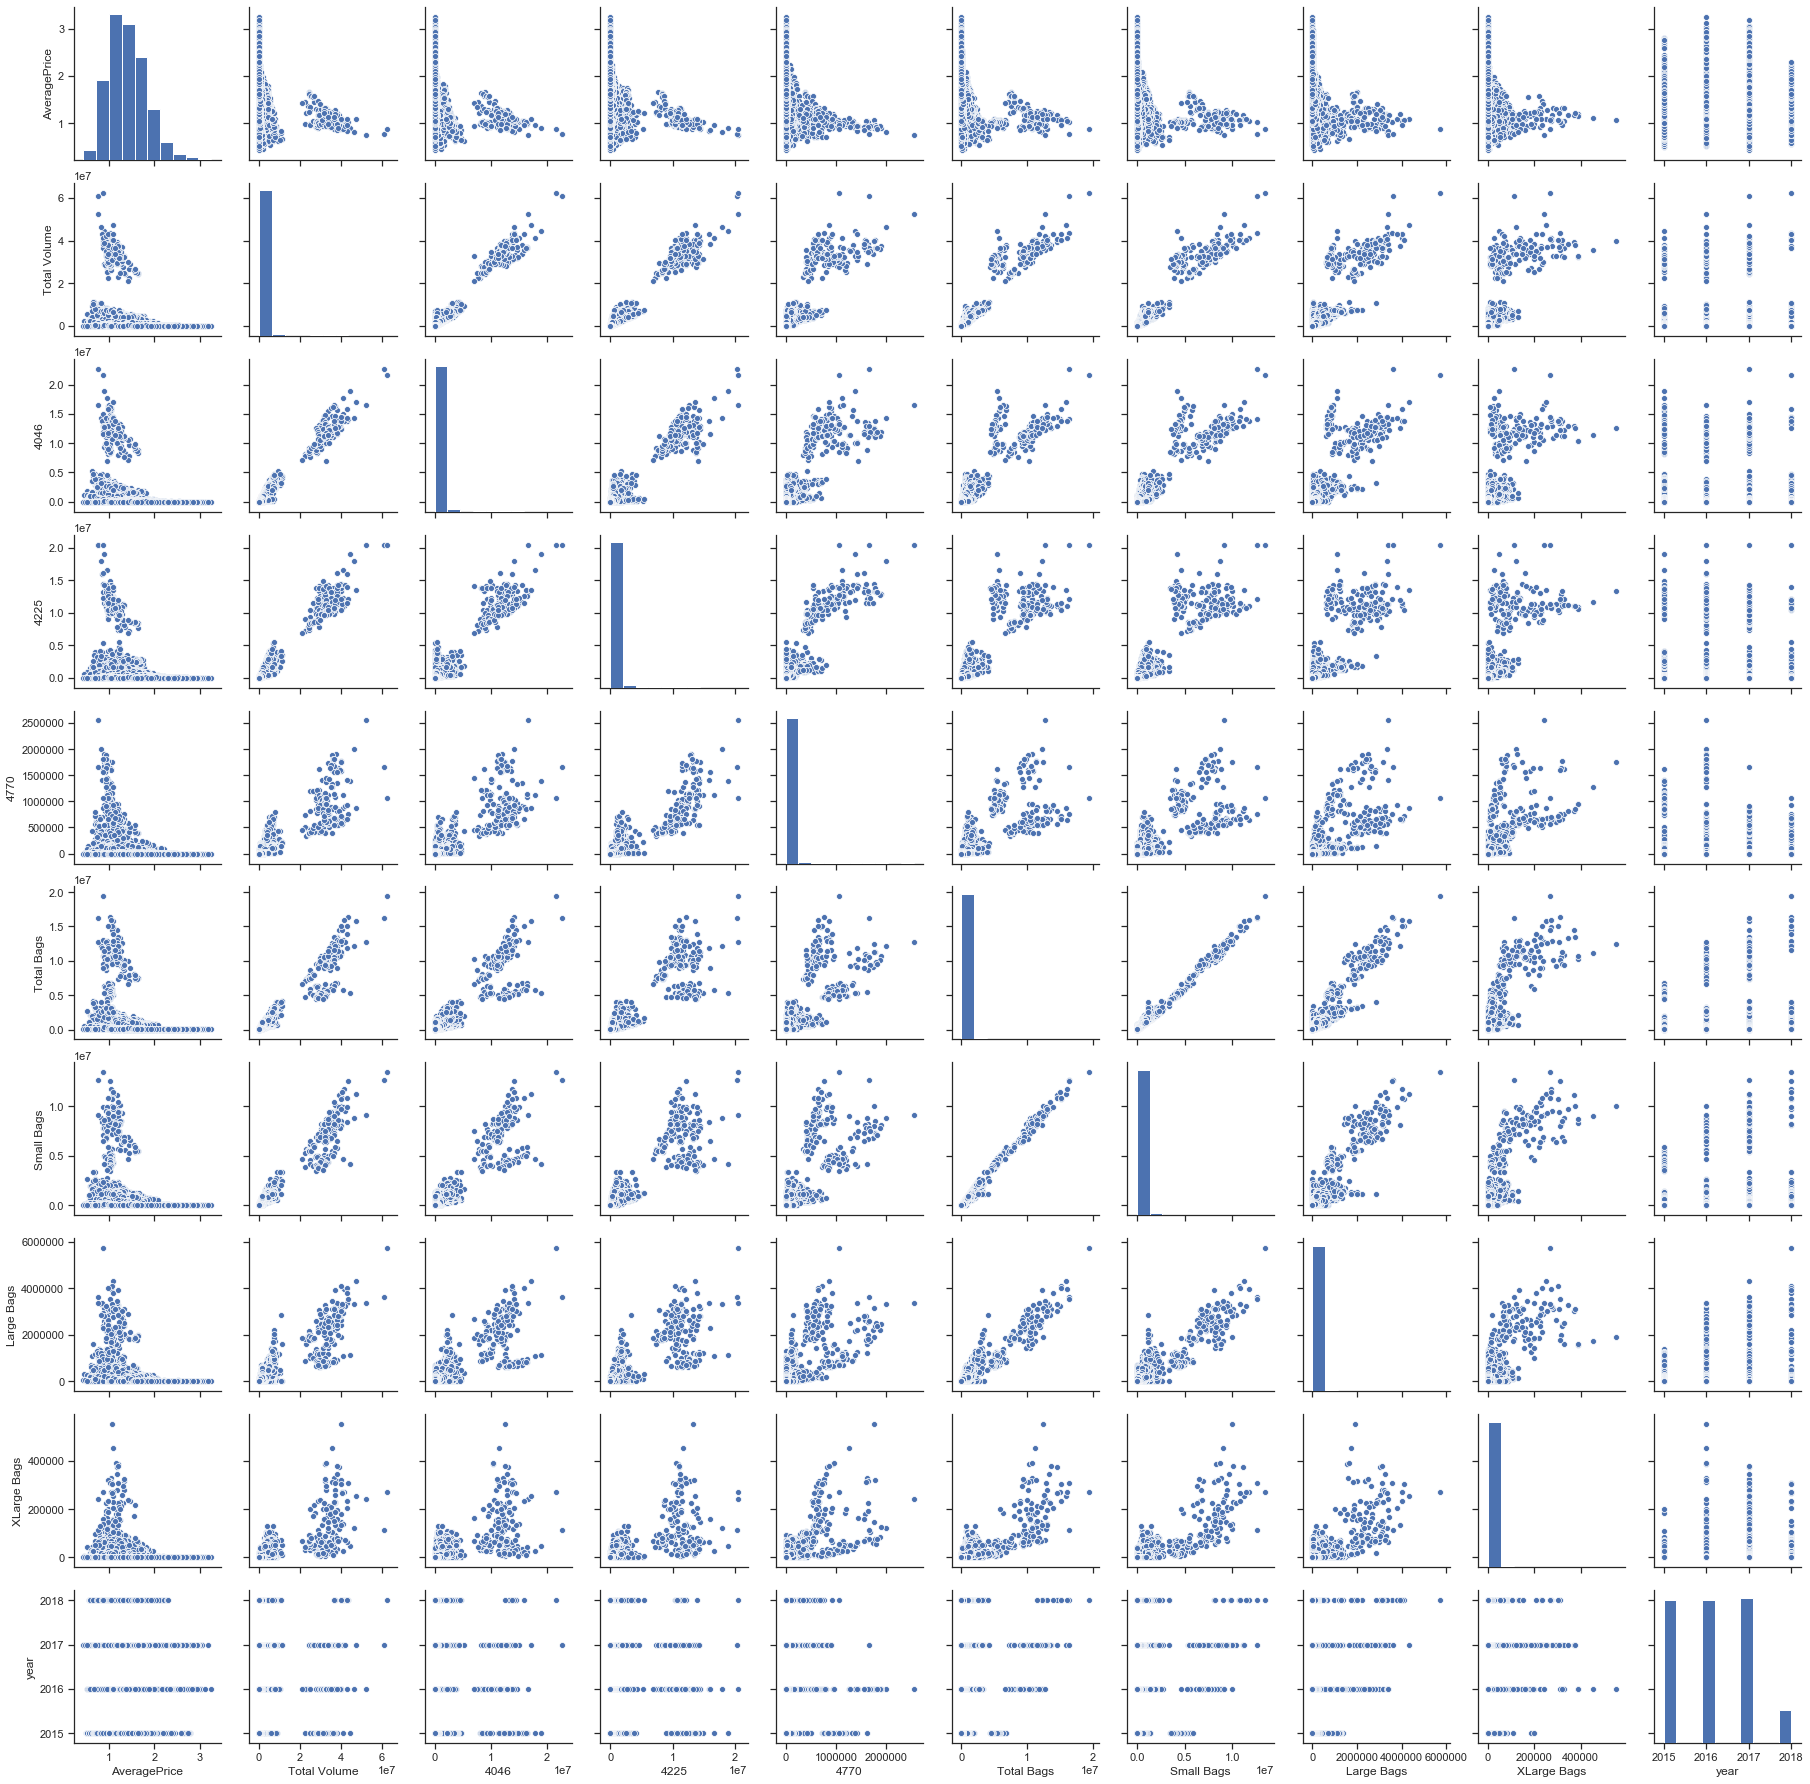

In [41]:
#Plot pairwise relationships in few data features  (plot size constraint)

plot_pair=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags']
sns.set(style="ticks")
sns.pairplot(df[plot_pair])

sns.pairplot(df)

Above Data Analysis we see Avocado Type measured with graph, with diff variables were compare with AveragePrice.

# Model


# Algorithm use

* LR - Linear Regression

* KNN - KNeighbors Classifier

* SVM - Support Vector Machine 

* SVR - Support Vector Regression

* NB - Naive Bayes

* DTC - Decision Tree Classifier

In [42]:
# import liabraries:

# model test & train split
from sklearn.model_selection import train_test_split

# standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

# encoding categorical values 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# k-Fold Cross-Validation
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

# stats
import statsmodels.api as sm

# Model Liabraries

#Multiclass classification: classification task with more than two classes. Each sample can only be labelled as one class.
from sklearn.multiclass import OneVsRestClassifier

# LR
from sklearn.linear_model import LinearRegression

# knn
from sklearn.neighbors import KNeighborsRegressor

# svc
from sklearn.svm import SVC

# svr
from sklearn.svm import SVR

# dt
from sklearn.tree import DecisionTreeRegressor

# nb
from sklearn.naive_bayes import GaussianNB

In [43]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

we need to set the target/dependent variable (denoted as y2), which is the column “AveragePrice” in the dataset. Other columns as the input/independent variables (denoted as x2)as an input, and estimate the average of AveragePrice given as specific input variables.

In [45]:
# Data prepearing and encoding categorical variables

x2=df.iloc[:,[1,2,3,4,5,6,7,8]]
y2=df.iloc[:,[0]]

# Encoding categorical data

labelencoder_x1=LabelEncoder()
lex1_fit=labelencoder_x1.fit_transform(df.iloc[:,9])

labelencoder_x2=LabelEncoder()
lex2_fit=labelencoder_x2.fit_transform(df.iloc[:,10])

labelencoder_x3=LabelEncoder()
lex3_fit=labelencoder_x3.fit_transform(df.iloc[:,11])

# Standardize the variabled

sc=StandardScaler()
sc_fit=sc.fit(df.drop(['AveragePrice','type','year','region'],axis=1))
sc_features=sc.transform(df.drop(['AveragePrice','type','year','region'],axis=1))
sc_scaled_features=pd.DataFrame(sc_features,columns=df.columns[1:9])
sc_scaled_features.head(10)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558
5,-0.230107,-0.230699,-0.205207,-0.212134,-0.236211,-0.235390,-0.222212,-0.17558
6,-0.222152,-0.230553,-0.183942,-0.211672,-0.234554,-0.233192,-0.222234,-0.17558
7,-0.214630,-0.231079,-0.160569,-0.211795,-0.236064,-0.235778,-0.220429,-0.17558
8,-0.217415,-0.230828,-0.172611,-0.211745,-0.231441,-0.229295,-0.221571,-0.17558
9,-0.224791,-0.230970,-0.191346,-0.211488,-0.234242,-0.233373,-0.220421,-0.17558


In [46]:
# spliting data into train and test model

x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.30,random_state=0)

In [47]:
# standard scale oof x (train abd test)
sc2=StandardScaler()
x2_train=sc2.fit_transform(x2_train)
x2_test=sc2.transform(x2_test)

# label encode of y (train and test)

label_encoder=preprocessing.LabelEncoder()
y2_train=label_encoder.fit_transform(y2_train)
y2_test=label_encoder.fit_transform(y2_test)

In [48]:
# Check Algorithms

n_neighbors=5

models=[]

models.append(('LinearRegression',LinearRegression()))

models.append(('knn',KNeighborsRegressor(n_neighbors=n_neighbors)))

models.append(('SVR',SVR()))

models.append(('SVM',SVC())) 

models.append(('NB',GaussianNB()))

models.append(("decision_tree",DecisionTreeRegressor()))

In [49]:
# evaluate each model in turn

results=[]

error='neg_mean_squared_error'

names=[]

for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x2_train,y2_train,cv=fold,scoring=error)
    results.append(result)
    names.append(name)
    ms="%s : %f (%f)"%(name,result.mean(),result.std())
    print(ms)

LinearRegression : -1537.414073 (50.135603)
knn : -543.109312 (31.531207)
SVR : -1198.374985 (44.690890)
SVM : -1377.117805 (176.362215)
NB : -6096.325811 (211.649202)
decision_tree : -817.449049 (73.028514)


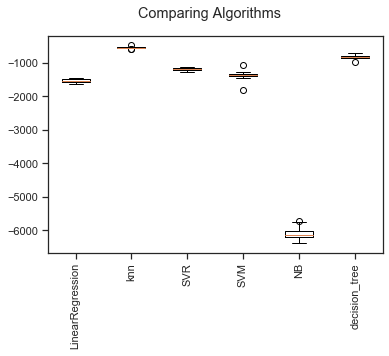

In [55]:
# Visualizing the Model accuracy thru box plot

ma=pyplot.figure()
ma.suptitle("Comparing Algorithms")
axis=ma.add_subplot(111)
pyplot.boxplot(results)
axis.set_xticklabels(names)
pyplot.xticks(rotation='90')
pyplot.show()

In [51]:
# Checking and Comparing Algorithms With MinmaxScaler (Backward calculation)

pipelines=[]

pipelines.append(('scaled LinearRegression',Pipeline([('scaler',MinMaxScaler()),('LinearRegression',LinearRegression())])))

pipelines.append(('scaled KNN',Pipeline([('scaler',MinMaxScaler()),('KNN',KNeighborsRegressor(n_neighbors=n_neighbors))])))

pipelines.append(('scaled SVR',Pipeline([('scaler',MinMaxScaler()),('SVR',SVR())])))

pipelines.append(('scaled SVM',Pipeline([('scaler',MinMaxScaler()),('SVM',SVC())])))

pipelines.append(('scaled DecisionTree',Pipeline([('scaler',MinMaxScaler()),('decision',DecisionTreeRegressor())])))

In [52]:
# Evaluating Each model (backward calculation)

names=[]

results2=[]

for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x2_train,y2_train,cv=fold,scoring=error)
    results2.append(result)
    names.append(name)
    ms2="%s : %f (%f)"%(name,result.mean(),result.std())
    print(ms2)

LinearRegression : -1537.414073 (50.135603)
knn : -543.109312 (31.531207)
SVR : -1198.374985 (44.690890)
SVM : -1377.117805 (176.362215)
NB : -6096.325811 (211.649202)
decision_tree : -813.238122 (75.021807)


In [53]:
# building regression function

model=sm.OLS(y2_train,x2_train)

# model fit into regression function

regression=model.fit()

# print regression summary

print(regression.summary())

                                 OLS Regression Results                                
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                          1.823e+04
Date:                Tue, 24 Mar 2020   Prob (F-statistic):                        0.00
Time:                        04:30:18   Log-Likelihood:                         -6200.3
No. Observations:               12774   AIC:                                  1.242e+04
Df Residuals:                   12765   BIC:                                  1.249e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

* R-squared (R²): Explains how well the model fits the data with a range of 0 -1, the higher the R² is, the better the model fits the data. (Concerns: If the R² is really close to 1, we may think there is an overfitting issue.)


* F-Statistic: The larger the F-Statistic gets, the better the model performs. Normally we take the number of data points into consideration when we decide how large the F-sats is the proof of the model is good at prediction.


* coef: how many the estimated average of the output variable will change the corresponding variable X changes by a unit.


* t: the t-score in this case, explains how many standard deviations away from the mean with regard to the input variable.


* P > |t|: the p-value, explains how strong the X relats to Y.

# conclusion

Above in statistical model we saw that our model is predict accuracy. In a positively skewed distribution, that means the mean is usually greater than the median because the few high scores tend to shift the mean to the right.

Predicted Model Results Below:

LinearRegression : -1537.414073 (50.135603)

knn : -543.109312 (31.531207)

SVR : -1198.374985 (44.690890)

SVM : -1377.117805 (176.362215)

NB : -6096.325811 (211.649202)

decision_tree : -813.238122 (75.021807) 

* we can analysis that knn result is good as compare to all other results as per train and test model after cross check of alogrithm with minmaxscaler. 

* we also analysis that Average price of Avocado as per year trend is increasing as compare to 2018, in 2018 Average price is in dicreasing trend as per pivot table comparising. 

* Avocado tye of conventional & organic Total volume of consuption is different, conventional volume consuption is larger than organic

* Avocado average price of organic is larger than consuption average price


we have to increase number of volume in organic as compare to consuption and average price of avocado should be increase as compare to previous years to maximize revenue. we select model knn of Regreesion as compare with Decision Tree cross validation  and other alogrithms to generate good Revenue volume of avocado as per location and season efect with average price.